## Mars Weather Prediction using Data from NASA’s InSight Mars Lander
NASA’s InSight Mars lander takes continuous weather measurements (temperature, wind, pressure) on the surface of Mars at Elysium Planitia, a flat, smooth plain near Mars’ equator.
This API provides per-Sol summary data for each of the last seven available Sols (Martian Days).

The API doc: https://api.nasa.gov/assets/insight/InSight%20Weather%20API%20Documentation.pdf

Check out NASA's Open APIs: https://api.nasa.gov/?ref=freepublicapis.com

## Problem Understanding and Definition

If we are to send humans on Mars we must know its weather conditions.

Predicting weather on Mars has many advantages, it helps in  understanding the planets atmosphere and its significance in the solar system. It is very crucial to understand the weather of the planet for future exploration. It also helps in planning robotic missions as well.

NASA's InSight Lander launched on May 5, 2018 collected data from the planets atmosphere. This Machine Learning Model uses supervised learning to predict data collected from the lander.

Due to the challenges of the mission, very little data was collected by the lander, therefore creating a model with this data will result in a rather inaccurate model. But with more data the model will become accurate.

## Data Collection and Preparation

In [ ]:
# importing all necessary libraries
%matplotlib inline
import requests
import pandas as pd
import numpy as np
from prettytable import PrettyTable
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
url = "https://api.nasa.gov/insight_weather/?api_key=oOTc2nyfEy4dFXwSMbue41j1sEXfnxnebi7BlgqX&feedtype=json&ver=1.0"
response = requests.get(url)
try:
    mars_data = response.json()
    print('API data successfully fetched!')
except ValueError as e:
    print(f"JSON decode error: {e}")
    print(response.text)
    print('API raw data loaded into varibale mars_data')
    mars_data = {
  "675": {
    "AT": {
      "av": -62.314,
      "ct": 177556,
      "mn": -96.872,
      "mx": -15.908
    },
    "First_UTC": "2020-10-19T18:32:20Z",
    "HWS": {
      "av": 7.233,
      "ct": 88628,
      "mn": 1.051,
      "mx": 22.455
    },
    "Last_UTC": "2020-10-20T19:11:55Z",
    "Month_ordinal": 10,
    "Northern_season": "early winter",
    "PRE": {
      "av": 750.563,
      "ct": 887776,
      "mn": 722.0901,
      "mx": 768.791
    },
    "Season": "fall",
    "Southern_season": "early summer",
    "WD": {
      "0": {
        "compass_degrees": 0.0,
        "compass_point": "N",
        "compass_right": 0.0,
        "compass_up": 1.0,
        "ct": 254
      },
      "1": {
        "compass_degrees": 22.5,
        "compass_point": "NNE",
        "compass_right": 0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 1
      },
      "10": {
        "compass_degrees": 225.0,
        "compass_point": "SW",
        "compass_right": -0.707106781187,
        "compass_up": -0.707106781187,
        "ct": 8618
      },
      "11": {
        "compass_degrees": 247.5,
        "compass_point": "WSW",
        "compass_right": -0.923879532511,
        "compass_up": -0.382683432365,
        "ct": 1912
      },
      "12": {
        "compass_degrees": 270.0,
        "compass_point": "W",
        "compass_right": -1.0,
        "compass_up": -0.0,
        "ct": 19517
      },
      "13": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 30283
      },
      "14": {
        "compass_degrees": 315.0,
        "compass_point": "NW",
        "compass_right": -0.707106781187,
        "compass_up": 0.707106781187,
        "ct": 25962
      },
      "15": {
        "compass_degrees": 337.5,
        "compass_point": "NNW",
        "compass_right": -0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 2014
      },
      "9": {
        "compass_degrees": 202.5,
        "compass_point": "SSW",
        "compass_right": -0.382683432365,
        "compass_up": -0.923879532511,
        "ct": 67
      },
      "most_common": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 30283
      }
    }
  },
  "676": {
    "AT": {
      "av": -62.812,
      "ct": 177554,
      "mn": -96.912,
      "mx": -16.499
    },
    "First_UTC": "2020-10-20T19:11:55Z",
    "HWS": {
      "av": 8.526,
      "ct": 88250,
      "mn": 1.11,
      "mx": 26.905
    },
    "Last_UTC": "2020-10-21T19:51:31Z",
    "Month_ordinal": 10,
    "Northern_season": "early winter",
    "PRE": {
      "av": 749.09,
      "ct": 887777,
      "mn": 722.473,
      "mx": 767.1426
    },
    "Season": "fall",
    "Southern_season": "early summer",
    "WD": {
      "0": {
        "compass_degrees": 0.0,
        "compass_point": "N",
        "compass_right": 0.0,
        "compass_up": 1.0,
        "ct": 463
      },
      "1": {
        "compass_degrees": 22.5,
        "compass_point": "NNE",
        "compass_right": 0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 45
      },
      "10": {
        "compass_degrees": 225.0,
        "compass_point": "SW",
        "compass_right": -0.707106781187,
        "compass_up": -0.707106781187,
        "ct": 2749
      },
      "11": {
        "compass_degrees": 247.5,
        "compass_point": "WSW",
        "compass_right": -0.923879532511,
        "compass_up": -0.382683432365,
        "ct": 4862
      },
      "12": {
        "compass_degrees": 270.0,
        "compass_point": "W",
        "compass_right": -1.0,
        "compass_up": -0.0,
        "ct": 20685
      },
      "13": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 31167
      },
      "14": {
        "compass_degrees": 315.0,
        "compass_point": "NW",
        "compass_right": -0.707106781187,
        "compass_up": 0.707106781187,
        "ct": 25783
      },
      "15": {
        "compass_degrees": 337.5,
        "compass_point": "NNW",
        "compass_right": -0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 2490
      },
      "2": {
        "compass_degrees": 45.0,
        "compass_point": "NE",
        "compass_right": 0.707106781187,
        "compass_up": 0.707106781187,
        "ct": 4
      },
      "5": {
        "compass_degrees": 112.5,
        "compass_point": "ESE",
        "compass_right": 0.923879532511,
        "compass_up": -0.382683432365,
        "ct": 2
      },
      "most_common": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 31167
      }
    }
  },
  "677": {
    "AT": {
      "av": -63.056,
      "ct": 177556,
      "mn": -97.249,
      "mx": -16.853
    },
    "First_UTC": "2020-10-21T19:51:31Z",
    "HWS": {
      "av": 7.887,
      "ct": 88610,
      "mn": 0.511,
      "mx": 23.197
    },
    "Last_UTC": "2020-10-22T20:31:06Z",
    "Month_ordinal": 11,
    "Northern_season": "mid winter",
    "PRE": {
      "av": 748.698,
      "ct": 887776,
      "mn": 720.5873,
      "mx": 767.4249
    },
    "Season": "fall",
    "Southern_season": "mid summer",
    "WD": {
      "0": {
        "compass_degrees": 0.0,
        "compass_point": "N",
        "compass_right": 0.0,
        "compass_up": 1.0,
        "ct": 511
      },
      "1": {
        "compass_degrees": 22.5,
        "compass_point": "NNE",
        "compass_right": 0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 12
      },
      "10": {
        "compass_degrees": 225.0,
        "compass_point": "SW",
        "compass_right": -0.707106781187,
        "compass_up": -0.707106781187,
        "ct": 3083
      },
      "11": {
        "compass_degrees": 247.5,
        "compass_point": "WSW",
        "compass_right": -0.923879532511,
        "compass_up": -0.382683432365,
        "ct": 3370
      },
      "12": {
        "compass_degrees": 270.0,
        "compass_point": "W",
        "compass_right": -1.0,
        "compass_up": -0.0,
        "ct": 19454
      },
      "13": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 34749
      },
      "14": {
        "compass_degrees": 315.0,
        "compass_point": "NW",
        "compass_right": -0.707106781187,
        "compass_up": 0.707106781187,
        "ct": 24014
      },
      "15": {
        "compass_degrees": 337.5,
        "compass_point": "NNW",
        "compass_right": -0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 3413
      },
      "2": {
        "compass_degrees": 45.0,
        "compass_point": "NE",
        "compass_right": 0.707106781187,
        "compass_up": 0.707106781187,
        "ct": 1
      },
      "5": {
        "compass_degrees": 112.5,
        "compass_point": "ESE",
        "compass_right": 0.923879532511,
        "compass_up": -0.382683432365,
        "ct": 3
      },
      "most_common": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 34749
      }
    }
  },
  "678": {
    "AT": {
      "av": -62.562,
      "ct": 177556,
      "mn": -97.728,
      "mx": -9.055
    },
    "First_UTC": "2020-10-22T20:31:06Z",
    "HWS": {
      "av": 5.246,
      "ct": 86963,
      "mn": 0.244,
      "mx": 18.399
    },
    "Last_UTC": "2020-10-23T21:10:41Z",
    "Month_ordinal": 11,
    "Northern_season": "mid winter",
    "PRE": {
      "av": 743.741,
      "ct": 887777,
      "mn": 717.7254,
      "mx": 760.2834
    },
    "Season": "fall",
    "Southern_season": "mid summer",
    "WD": {
      "0": {
        "compass_degrees": 0.0,
        "compass_point": "N",
        "compass_right": 0.0,
        "compass_up": 1.0,
        "ct": 2680
      },
      "1": {
        "compass_degrees": 22.5,
        "compass_point": "NNE",
        "compass_right": 0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 1025
      },
      "10": {
        "compass_degrees": 225.0,
        "compass_point": "SW",
        "compass_right": -0.707106781187,
        "compass_up": -0.707106781187,
        "ct": 10492
      },
      "11": {
        "compass_degrees": 247.5,
        "compass_point": "WSW",
        "compass_right": -0.923879532511,
        "compass_up": -0.382683432365,
        "ct": 3499
      },
      "12": {
        "compass_degrees": 270.0,
        "compass_point": "W",
        "compass_right": -1.0,
        "compass_up": -0.0,
        "ct": 22094
      },
      "13": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 26617
      },
      "14": {
        "compass_degrees": 315.0,
        "compass_point": "NW",
        "compass_right": -0.707106781187,
        "compass_up": 0.707106781187,
        "ct": 14104
      },
      "15": {
        "compass_degrees": 337.5,
        "compass_point": "NNW",
        "compass_right": -0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 4388
      },
      "2": {
        "compass_degrees": 45.0,
        "compass_point": "NE",
        "compass_right": 0.707106781187,
        "compass_up": 0.707106781187,
        "ct": 305
      },
      "3": {
        "compass_degrees": 67.5,
        "compass_point": "ENE",
        "compass_right": 0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 31
      },
      "5": {
        "compass_degrees": 112.5,
        "compass_point": "ESE",
        "compass_right": 0.923879532511,
        "compass_up": -0.382683432365,
        "ct": 211
      },
      "6": {
        "compass_degrees": 135.0,
        "compass_point": "SE",
        "compass_right": 0.707106781187,
        "compass_up": -0.707106781187,
        "ct": 45
      },
      "7": {
        "compass_degrees": 157.5,
        "compass_point": "SSE",
        "compass_right": 0.382683432365,
        "compass_up": -0.923879532511,
        "ct": 174
      },
      "8": {
        "compass_degrees": 180.0,
        "compass_point": "S",
        "compass_right": 0.0,
        "compass_up": -1.0,
        "ct": 437
      },
      "9": {
        "compass_degrees": 202.5,
        "compass_point": "SSW",
        "compass_right": -0.382683432365,
        "compass_up": -0.923879532511,
        "ct": 861
      },
      "most_common": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 26617
      }
    }
  },
  "679": {
    "AT": {
      "av": -62.551,
      "ct": 177554,
      "mn": -96.644,
      "mx": -11.561
    },
    "First_UTC": "2020-10-23T21:10:41Z",
    "HWS": {
      "av": 5.565,
      "ct": 87171,
      "mn": 0.231,
      "mx": 19.409000000000002
    },
    "Last_UTC": "2020-10-24T21:50:16Z",
    "Month_ordinal": 11,
    "Northern_season": "mid winter",
    "PRE": {
      "av": 744.529,
      "ct": 887776,
      "mn": 719.4178,
      "mx": 763.2724
    },
    "Season": "fall",
    "Southern_season": "mid summer",
    "WD": {
      "0": {
        "compass_degrees": 0.0,
        "compass_point": "N",
        "compass_right": 0.0,
        "compass_up": 1.0,
        "ct": 2049
      },
      "1": {
        "compass_degrees": 22.5,
        "compass_point": "NNE",
        "compass_right": 0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 657
      },
      "10": {
        "compass_degrees": 225.0,
        "compass_point": "SW",
        "compass_right": -0.707106781187,
        "compass_up": -0.707106781187,
        "ct": 11924
      },
      "11": {
        "compass_degrees": 247.5,
        "compass_point": "WSW",
        "compass_right": -0.923879532511,
        "compass_up": -0.382683432365,
        "ct": 1379
      },
      "12": {
        "compass_degrees": 270.0,
        "compass_point": "W",
        "compass_right": -1.0,
        "compass_up": -0.0,
        "ct": 21329
      },
      "13": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 28774
      },
      "14": {
        "compass_degrees": 315.0,
        "compass_point": "NW",
        "compass_right": -0.707106781187,
        "compass_up": 0.707106781187,
        "ct": 15570
      },
      "15": {
        "compass_degrees": 337.5,
        "compass_point": "NNW",
        "compass_right": -0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 3784
      },
      "2": {
        "compass_degrees": 45.0,
        "compass_point": "NE",
        "compass_right": 0.707106781187,
        "compass_up": 0.707106781187,
        "ct": 83
      },
      "3": {
        "compass_degrees": 67.5,
        "compass_point": "ENE",
        "compass_right": 0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 17
      },
      "5": {
        "compass_degrees": 112.5,
        "compass_point": "ESE",
        "compass_right": 0.923879532511,
        "compass_up": -0.382683432365,
        "ct": 138
      },
      "6": {
        "compass_degrees": 135.0,
        "compass_point": "SE",
        "compass_right": 0.707106781187,
        "compass_up": -0.707106781187,
        "ct": 11
      },
      "7": {
        "compass_degrees": 157.5,
        "compass_point": "SSE",
        "compass_right": 0.382683432365,
        "compass_up": -0.923879532511,
        "ct": 137
      },
      "8": {
        "compass_degrees": 180.0,
        "compass_point": "S",
        "compass_right": 0.0,
        "compass_up": -1.0,
        "ct": 410
      },
      "9": {
        "compass_degrees": 202.5,
        "compass_point": "SSW",
        "compass_right": -0.382683432365,
        "compass_up": -0.923879532511,
        "ct": 909
      },
      "most_common": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 28774
      }
    }
  },
  "680": {
    "AT": {
      "av": -61.789,
      "ct": 168902,
      "mn": -96.811,
      "mx": -15.298
    },
    "First_UTC": "2020-10-24T21:50:16Z",
    "HWS": {
      "av": 6.517,
      "ct": 88478,
      "mn": 0.275,
      "mx": 24.235
    },
    "Last_UTC": "2020-10-25T22:29:51Z",
    "Month_ordinal": 11,
    "Northern_season": "mid winter",
    "PRE": {
      "av": 743.99,
      "ct": 887767,
      "mn": 717.1398,
      "mx": 764.0093
    },
    "Season": "fall",
    "Southern_season": "mid summer",
    "WD": {
      "0": {
        "compass_degrees": 0.0,
        "compass_point": "N",
        "compass_right": 0.0,
        "compass_up": 1.0,
        "ct": 1033
      },
      "1": {
        "compass_degrees": 22.5,
        "compass_point": "NNE",
        "compass_right": 0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 133
      },
      "10": {
        "compass_degrees": 225.0,
        "compass_point": "SW",
        "compass_right": -0.707106781187,
        "compass_up": -0.707106781187,
        "ct": 6463
      },
      "11": {
        "compass_degrees": 247.5,
        "compass_point": "WSW",
        "compass_right": -0.923879532511,
        "compass_up": -0.382683432365,
        "ct": 2556
      },
      "12": {
        "compass_degrees": 270.0,
        "compass_point": "W",
        "compass_right": -1.0,
        "compass_up": -0.0,
        "ct": 21280
      },
      "13": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 34787
      },
      "14": {
        "compass_degrees": 315.0,
        "compass_point": "NW",
        "compass_right": -0.707106781187,
        "compass_up": 0.707106781187,
        "ct": 18673
      },
      "15": {
        "compass_degrees": 337.5,
        "compass_point": "NNW",
        "compass_right": -0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 3262
      },
      "5": {
        "compass_degrees": 112.5,
        "compass_point": "ESE",
        "compass_right": 0.923879532511,
        "compass_up": -0.382683432365,
        "ct": 10
      },
      "6": {
        "compass_degrees": 135.0,
        "compass_point": "SE",
        "compass_right": 0.707106781187,
        "compass_up": -0.707106781187,
        "ct": 6
      },
      "7": {
        "compass_degrees": 157.5,
        "compass_point": "SSE",
        "compass_right": 0.382683432365,
        "compass_up": -0.923879532511,
        "ct": 23
      },
      "8": {
        "compass_degrees": 180.0,
        "compass_point": "S",
        "compass_right": 0.0,
        "compass_up": -1.0,
        "ct": 76
      },
      "9": {
        "compass_degrees": 202.5,
        "compass_point": "SSW",
        "compass_right": -0.382683432365,
        "compass_up": -0.923879532511,
        "ct": 176
      },
      "most_common": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 34787
      }
    }
  },
  "681": {
    "AT": {
      "av": -62.434,
      "ct": 88778,
      "mn": -95.447,
      "mx": -4.444
    },
    "First_UTC": "2020-10-25T22:29:51Z",
    "HWS": {
      "av": 5.632,
      "ct": 87184,
      "mn": 0.228,
      "mx": 18.577
    },
    "Last_UTC": "2020-10-26T23:09:26Z",
    "Month_ordinal": 11,
    "Northern_season": "mid winter",
    "PRE": {
      "av": 743.55,
      "ct": 887777,
      "mn": 718.463,
      "mx": 760.2244
    },
    "Season": "fall",
    "Southern_season": "mid summer",
    "WD": {
      "0": {
        "compass_degrees": 0.0,
        "compass_point": "N",
        "compass_right": 0.0,
        "compass_up": 1.0,
        "ct": 1872
      },
      "1": {
        "compass_degrees": 22.5,
        "compass_point": "NNE",
        "compass_right": 0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 881
      },
      "10": {
        "compass_degrees": 225.0,
        "compass_point": "SW",
        "compass_right": -0.707106781187,
        "compass_up": -0.707106781187,
        "ct": 12182
      },
      "11": {
        "compass_degrees": 247.5,
        "compass_point": "WSW",
        "compass_right": -0.923879532511,
        "compass_up": -0.382683432365,
        "ct": 1249
      },
      "12": {
        "compass_degrees": 270.0,
        "compass_point": "W",
        "compass_right": -1.0,
        "compass_up": -0.0,
        "ct": 22409
      },
      "13": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 27816
      },
      "14": {
        "compass_degrees": 315.0,
        "compass_point": "NW",
        "compass_right": -0.707106781187,
        "compass_up": 0.707106781187,
        "ct": 15971
      },
      "15": {
        "compass_degrees": 337.5,
        "compass_point": "NNW",
        "compass_right": -0.382683432365,
        "compass_up": 0.923879532511,
        "ct": 3412
      },
      "2": {
        "compass_degrees": 45.0,
        "compass_point": "NE",
        "compass_right": 0.707106781187,
        "compass_up": 0.707106781187,
        "ct": 201
      },
      "3": {
        "compass_degrees": 67.5,
        "compass_point": "ENE",
        "compass_right": 0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 57
      },
      "5": {
        "compass_degrees": 112.5,
        "compass_point": "ESE",
        "compass_right": 0.923879532511,
        "compass_up": -0.382683432365,
        "ct": 129
      },
      "6": {
        "compass_degrees": 135.0,
        "compass_point": "SE",
        "compass_right": 0.707106781187,
        "compass_up": -0.707106781187,
        "ct": 17
      },
      "7": {
        "compass_degrees": 157.5,
        "compass_point": "SSE",
        "compass_right": 0.382683432365,
        "compass_up": -0.923879532511,
        "ct": 112
      },
      "8": {
        "compass_degrees": 180.0,
        "compass_point": "S",
        "compass_right": 0.0,
        "compass_up": -1.0,
        "ct": 387
      },
      "9": {
        "compass_degrees": 202.5,
        "compass_point": "SSW",
        "compass_right": -0.382683432365,
        "compass_up": -0.923879532511,
        "ct": 489
      },
      "most_common": {
        "compass_degrees": 292.5,
        "compass_point": "WNW",
        "compass_right": -0.923879532511,
        "compass_up": 0.382683432365,
        "ct": 27816
      }
    }
  },
  "sol_keys": [
    "675",
    "676",
    "677",
    "678",
    "679",
    "680",
    "681"
  ],
  "validity_checks": {
    "674": {
      "AT": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "HWS": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "PRE": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "WD": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      }
    },
    "675": {
      "AT": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "HWS": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "PRE": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "WD": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      }
    },
    "676": {
      "AT": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "HWS": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "PRE": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "WD": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      }
    },
    "677": {
      "AT": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "HWS": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "PRE": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "WD": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      }
    },
    "678": {
      "AT": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "HWS": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "PRE": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "WD": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      }
    },
    "679": {
      "AT": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "HWS": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "PRE": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "WD": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      }
    },
    "680": {
      "AT": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "HWS": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "PRE": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "WD": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      }
    },
    "681": {
      "AT": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "HWS": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "PRE": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      },
      "WD": {
        "sol_hours_with_data": [
          0,
          1,
          2,
          3,
          4,
          5,
          6,
          7,
          8,
          9,
          10,
          11,
          12,
          13,
          14,
          15,
          16,
          17,
          18,
          19,
          20,
          21,
          22,
          23
        ],
        "valid": True
      }
    },
    "682": {
      "AT": {
        "sol_hours_with_data": [
          0
        ],
        "valid": False
      },
      "HWS": {
        "sol_hours_with_data": [
          0
        ],
        "valid": False
      },
      "PRE": {
        "sol_hours_with_data": [
          0
        ],
        "valid": False
      },
      "WD": {
        "sol_hours_with_data": [
          0
        ],
        "valid": False
      }
    },
    "sol_hours_required": 18,
    "sols_checked": [
      "674",
      "675",
      "676",
      "677",
      "678",
      "679",
      "680",
      "681",
      "682"
    ]
  }
}

JSON decode error: Expecting value: line 1 column 1 (char 0)
<html>
<head><title>403 Forbidden</title></head>
<body>
<h1>403 Forbidden</h1>
<ul>
<li>Code: AccessDenied</li>
<li>Message: Access Denied</li>
<li>RequestId: 55YE0XF6BYR6KZPM</li>
<li>HostId: c5TvHDpZUHdJqvHa34C56zFyZt/iN3Poj0WdBK3kL3W74wo4KFdhyXm88vE96i6XiFXULOPD8f8=</li>
</ul>
<hr/>
</body>
</html>

API raw data loaded into varibale mars_data


In [ ]:
def check_rate_limits():
    ratelimit_allowed = response.headers.get('X-RateLimit-Limit')
    ratelimit_remaining = response.headers.get('X-RateLimit-Remaining')

    rate_limits = {
        'Rate limit': ratelimit_allowed,
        'Rate limit remaining': ratelimit_remaining
    }

    print(rate_limits)

check_rate_limits()

{'Rate limit': '2000', 'Rate limit remaining': '1997'}


In [ ]:
# finding the how many sols' data is available in the api
a = mars_data["validity_checks"]["sols_checked"]
no_of_sol = list(map(int, a))
# in the validity checks, sols checked, the first and last sol have no avialble data, therefore will be deleted
del no_of_sol[0]
del no_of_sol[-1]
print(f"Sols in the dataset: \n{no_of_sol}")

Sols in the dataset: 
[675, 676, 677, 678, 679, 680, 681]


In [ ]:
# atmospheric temperature, Minimum data sample over the sol
print("Minimum Atmospheric Temperature data sample over the sol °F:")
for i in no_of_sol:
    while True:
        x = mars_data[f"{i}"]["AT"]["mn"]
        print(f"{x} °F")
        break

Minimum Atmospheric Temperature data sample over the sol °F:
-96.872 °F
-96.912 °F
-97.249 °F
-97.728 °F
-96.644 °F
-96.811 °F
-95.447 °F


In [ ]:
# atmospheric temperature, Maximum data sample over the sol
print("Maximum Atmospheric temperature data sample over the sol °F:")
for i in no_of_sol:
    while True:
        x = mars_data[f"{i}"]["AT"]["mx"]
        print(f"{x} °F")
        break

Maximum Atmospheric temperature data sample over the sol °F:
-15.908 °F
-16.499 °F
-16.853 °F
-9.055 °F
-11.561 °F
-15.298 °F
-4.444 °F


In [ ]:
# minimum horizontal wind speed
print("Minimum Horizontal Wind Speed metres per second:")
for i in no_of_sol:
    while True:
        x = mars_data[f"{i}"]["HWS"]["mn"]
        print(f"{x} m/s")
        break

Minimum Horizontal Wind Speed metres per second:
1.051 m/s
1.11 m/s
0.511 m/s
0.244 m/s
0.231 m/s
0.275 m/s
0.228 m/s


In [ ]:
# maximum horizontal wind speed
print("Maximum Horizontal Wind Speed metres per second:")
for i in no_of_sol:
    while True:
        x = mars_data[f"{i}"]["HWS"]["mx"]
        print(f"{x} m/s")
        break

Maximum Horizontal Wind Speed metres per second:
22.455 m/s
26.905 m/s
23.197 m/s
18.399 m/s
19.409000000000002 m/s
24.235 m/s
18.577 m/s


In [ ]:
# minimum atmosphereic pressure Pascals
print("Minimum Atmosphereic Pressure Pascals:")
for i in no_of_sol:
    while True:
        x = mars_data[f"{i}"]["PRE"]["mn"]
        print(f"{x} Pa")
        break

Minimum Atmosphereic Pressure Pascals:
722.0901 Pa
722.473 Pa
720.5873 Pa
717.7254 Pa
719.4178 Pa
717.1398 Pa
718.463 Pa


In [ ]:
# maximum atmosphereic pressure Pascals
print("Maximum Atmosphereic Pressure Pascals:")
for i in no_of_sol:
    while True:
        x = mars_data[f"{i}"]["PRE"]["mx"]
        print(f"{x} Pa")
        break

Maximum Atmosphereic Pressure Pascals:
768.791 Pa
767.1426 Pa
767.4249 Pa
760.2834 Pa
763.2724 Pa
764.0093 Pa
760.2244 Pa


In [ ]:
# Time of first datum, of any sensor, for the Sol (UTC; YYYY-MM-DDTHH:MM:SSZ)
print("Time of first datum:")
for i in no_of_sol:
    while True:
        x = mars_data[f"{i}"]["First_UTC"]
        print(x)
        break

Time of first datum:
2020-10-19T18:32:20Z
2020-10-20T19:11:55Z
2020-10-21T19:51:31Z
2020-10-22T20:31:06Z
2020-10-23T21:10:41Z
2020-10-24T21:50:16Z
2020-10-25T22:29:51Z


In [ ]:
# Time of last datum, of any sensor, for the Sol (UTC; YYYY-MM-DDTHH:MM:SSZ)
print("Time of last datum:")
for i in no_of_sol:
    while True:
        x = mars_data[f"{i}"]["Last_UTC"]
        print(x)
        break

Time of last datum:
2020-10-20T19:11:55Z
2020-10-21T19:51:31Z
2020-10-22T20:31:06Z
2020-10-23T21:10:41Z
2020-10-24T21:50:16Z
2020-10-25T22:29:51Z
2020-10-26T23:09:26Z


In [ ]:
# Season on Northern Mars
print("Season on Northern Mars:")
for i in no_of_sol:
    while True:
        x = mars_data[f"{i}"]["Northern_season"]
        print(x)
        break

Season on Northern Mars:
early winter
early winter
mid winter
mid winter
mid winter
mid winter
mid winter


In [ ]:
# Season on Southern Mars
print("Season on Southern Mars:")
for i in no_of_sol:
    while True:
        x = mars_data[f"{i}"]["Southern_season"]
        print(x)
        break

Season on Southern Mars:
early summer
early summer
mid summer
mid summer
mid summer
mid summer
mid summer


In [ ]:
# Month ordinal
print("Month Ordinal:")
for i in no_of_sol:
    while True:
        x = mars_data[f"{i}"]["Month_ordinal"]
        print(x)
        break

Month Ordinal:
10
10
11
11
11
11
11


In [ ]:
# maximum atmosphereic pressure Pascals
print("Wind direction data for most common compass point:")
for i in no_of_sol:
    while True:
        x = mars_data[f"{i}"]["WD"]["most_common"]["compass_point"]
        print(x)
        break

Wind direction data for most common compass point:
WNW
WNW
WNW
WNW
WNW
WNW
WNW


In [ ]:
# all the data in the api will be stored in a tabular form using PrettyTable library
data_table = PrettyTable()
for data in mars_data:
    for i in no_of_sol:
      # creating a table with the data collected from API
        at_mx = mars_data[f"{i}"]["AT"]["mx"]
        at_mn = mars_data[f"{i}"]["AT"]["mn"]
        hws_mx = mars_data[f"{i}"]["HWS"]["mx"]
        hws_mn = mars_data[f"{i}"]["HWS"]["mn"]
        pre_mx = mars_data[f"{i}"]["PRE"]["mx"]
        pre_mn = mars_data[f"{i}"]["PRE"]["mn"]
        first = mars_data[f"{i}"]["First_UTC"]
        last = mars_data[f"{i}"]["Last_UTC"]
        ns = mars_data[f"{i}"]["Northern_season"]
        ss = mars_data[f"{i}"]["Southern_season"]
        mo = mars_data[f"{i}"]["Month_ordinal"]
        wd = mars_data[f"{i}"]["WD"]["most_common"]["compass_point"]
        data_table.add_row((i, f"{at_mn:.3f}", f"{at_mx:.3f}", f"{hws_mn:.3f}",  f"{hws_mx:.3f}", f"{pre_mx:.3f}", f"{pre_mn:.3f}", first, last, f"{ns.upper()}", f"{ss .upper()}", mo, f"{wd .upper()}"))
    break

data_table.field_names = ['Sol', 'Min AT °F', 'Max AT °F', 'Min HWS m/s', 'Max HWS m/s', 'Max Pressure Pa', 'Min Pressure Pa', 'First UTC', 'Last UTC', 'Northern Season', 'Southern Season', 'Month Ordinal', 'Wind Direction']
print(f"This is the final data table created using PrettyTable library:\n{data_table}")

This is the final data table created using PrettyTable library:
+-----+-----------+-----------+-------------+-------------+-----------------+-----------------+----------------------+----------------------+-----------------+-----------------+---------------+----------------+
| Sol | Min AT °F | Max AT °F | Min HWS m/s | Max HWS m/s | Max Pressure Pa | Min Pressure Pa |      First UTC       |       Last UTC       | Northern Season | Southern Season | Month Ordinal | Wind Direction |
+-----+-----------+-----------+-------------+-------------+-----------------+-----------------+----------------------+----------------------+-----------------+-----------------+---------------+----------------+
| 675 |  -96.872  |  -15.908  |    1.051    |    22.455   |     768.791     |     722.090     | 2020-10-19T18:32:20Z | 2020-10-20T19:11:55Z |   EARLY WINTER  |   EARLY SUMMER  |       10      |      WNW       |
| 676 |  -96.912  |  -16.499  |    1.110    |    26.905   |     767.143     |     722.473   

In [ ]:
# from the table above, I filtered the data to show only relevent columns and rows
# I converted the table into a csv file to make a DataFrame of it
with open('mars_weather_data.csv', 'w', newline='') as file_output:
    file_output.write(data_table.get_csv_string())

data = pd.read_csv('mars_weather_data.csv')

data = data.drop(columns=['First UTC', 'Last UTC', 'Wind Direction', 'Northern Season', 'Southern Season'])
#reording the columns to have Min AT °F	and Max AT °F at the last
data = data.iloc[:,[0, 3,4,5,6,7,1,2]]
data = pd.DataFrame(data)
data

,Sol,Min HWS m/s,Max HWS m/s,Max Pressure Pa,Min Pressure Pa,Month Ordinal,Min AT °F,Max AT °F
0,675,1.051,22.455,768.791,722.090,10,-96.872,-15.908
1,676,1.110,26.905,767.143,722.473,10,-96.912,-16.499
2,677,0.511,23.197,767.425,720.587,11,-97.249,-16.853
3,678,0.244,18.399,760.283,717.725,11,-97.728,-9.055
4,679,0.231,19.409,763.272,719.418,11,-96.644,-11.561
5,680,0.275,24.235,764.009,717.140,11,-96.811,-15.298
6,681,0.228,18.577,760.224,718.463,11,-95.447,-4.444


## Exploratory Data Analysis (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sol              7 non-null      int64  
 1   Min HWS m/s      7 non-null      float64
 2   Max HWS m/s      7 non-null      float64
 3   Max Pressure Pa  7 non-null      float64
 4   Min Pressure Pa  7 non-null      float64
 5   Month Ordinal    7 non-null      int64  
 6   Min AT °F        7 non-null      float64
 7   Max AT °F        7 non-null      float64
dtypes: float64(6), int64(2)
memory usage: 580.0 bytes


In [ ]:
data.describe()

,Sol,Min HWS m/s,Max HWS m/s,Max Pressure Pa,Min Pressure Pa,Month Ordinal,Min AT °F,Max AT °F
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,678.000000,0.521429,21.882429,764.449571,719.699429,10.714286,-96.809000,-12.802571
std,2.160247,0.394781,3.214414,3.458137,2.091742,0.487950,0.699406,4.679600
min,675.000000,0.228000,18.399000,760.224000,717.140000,10.000000,-97.728000,-16.853000
25%,676.500000,0.237500,18.993000,761.777500,718.094000,10.500000,-97.080500,-16.203500
50%,678.000000,0.275000,22.455000,764.009000,719.418000,11.000000,-96.872000,-15.298000
75%,679.500000,0.781000,23.716000,767.284000,721.338500,11.000000,-96.727500,-10.308000
max,681.000000,1.110000,26.905000,768.791000,722.473000,11.000000,-95.447000,-4.444000


In [ ]:
# finding the co-relation between the rows and columns
data.corr()

,Sol,Min HWS m/s,Max HWS m/s,Max Pressure Pa,Min Pressure Pa,Month Ordinal,Min AT °F,Max AT °F
Sol,1.000000,-0.863600,-0.498325,-0.805888,-0.837855,0.790569,0.560597,0.693864
Min HWS m/s,-0.863600,1.000000,0.698793,0.817915,0.910691,-0.967418,-0.169930,-0.632945
Max HWS m/s,-0.498325,0.698793,1.000000,0.753915,0.547950,-0.594542,-0.210937,-0.834243
Max Pressure Pa,-0.805888,0.817915,0.753915,1.000000,0.815647,-0.694843,-0.274237,-0.893822
Min Pressure Pa,-0.837855,0.910691,0.547950,0.815647,1.000000,-0.843264,-0.084035,-0.561334
Month Ordinal,0.790569,-0.967418,-0.594542,-0.694843,-0.843264,1.000000,0.081069,0.496469
Min AT °F,0.560597,-0.169930,-0.210937,-0.274237,-0.084035,0.081069,1.000000,0.535134
Max AT °F,0.693864,-0.632945,-0.834243,-0.893822,-0.561334,0.496469,0.535134,1.000000


<Axes: >

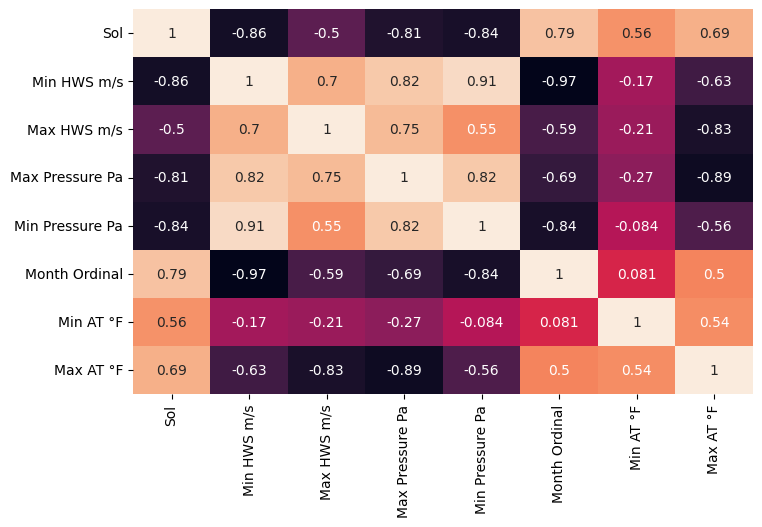

In [ ]:
# heatmap to find the relation between columns
plt.figure(figsize = (8,5))
sns.heatmap(data.corr(), cbar = False, annot = True)

Evaluation of the heat map

1.   Sol and Month Ordinal influence the min and max atmospheric temperature the most, since in the heat map they have positive values.
1.   Min and max atmospheric temperature influence each other as well, since in the heat map they have positive values.

In [ ]:
# to find out any null or missing values in the data
data.isnull()

,Sol,Min HWS m/s,Max HWS m/s,Max Pressure Pa,Min Pressure Pa,Month Ordinal,Min AT °F,Max AT °F
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False


The data has no null or missing values.

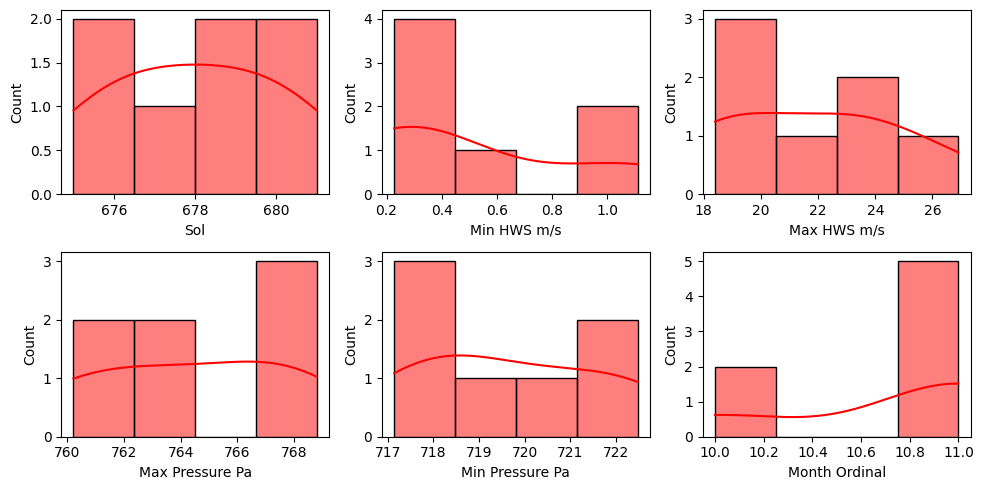

In [ ]:
# histograms to show the value or count of the data
# number of rows and columns to represent the histogram
n_rows=2
n_cols=3

# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(data.iloc[:, :-2].columns):
    sns.histplot(data[column], ax=axes[i//n_cols, i % n_cols], kde=True, color='red')
plt.tight_layout()

In [ ]:
# calculating unique values in the dataset
for i in data.columns:
  unique_values = data[i].unique()
  print(f'The Column {i} has {len(unique_values)} unique values.')

The Column Sol has 7 unique values.
The Column Min HWS m/s has 7 unique values.
The Column Max HWS m/s has 7 unique values.
The Column Max Pressure Pa has 7 unique values.
The Column Min Pressure Pa has 7 unique values.
The Column Month Ordinal has 2 unique values.
The Column Min AT °F has 7 unique values.
The Column Max AT °F has 7 unique values.


The data does not have a categorical nature, all the values are different and can not be classified into certain categories. This reduces the accuracy of the model.

## Feature Engineering

In [ ]:
# creating functions to make 2 predictions
def printPredictions(y_true,y_pred, count):
  print('Predictions:')
  print(y_true.assign(
      Y1_pred = y_pred[:,0], # predicting min AT
      Y2_pred = y_pred[:,1] # predicting max AT
  ).head(count).to_markdown(index = False))

# r2 is the Coefficient of determination, it greater the number the better the model
def showResults(y_true, y_pred, count = 1):
  print('R2 Score: ',r2_score(y_true,y_pred))
  print('Mean Squared Error: ',mean_squared_error(y_true,y_pred))
  print('Mean Absolute Error: ',mean_absolute_error(y_true,y_pred))
  mape = mean_absolute_percentage_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
  print("Mean Absolute Percentage Error", mape)
  printPredictions(y_true,y_pred, count)
  # plot original vs predicted values
  plt.scatter(y_test, y_pred)
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Actual vs Predicted')
  plt.show()
  # This plot shows the residuals (differences between the predicted and actual petal widths) against the predicted values.
  residuals = y_test - y_pred
  plt.scatter(y_pred, residuals)
  plt.xlabel('Predicted')
  plt.ylabel('Residuals')
  plt.title('Residual Plot')
  plt.axhline(y=0, color='r', linestyle='--')
  plt.show()

In [ ]:
# splitting data into training and testing with 20% test size
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:-2], data.iloc[:,-2:], test_size = 0.2, random_state = 42)
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(5, 6) (2, 6)
(5, 2) (2, 2)


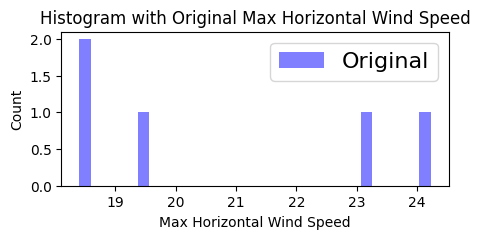

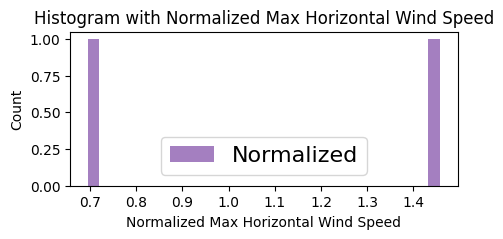

In [ ]:
# using normalization for feature scaling
# the initial distribution of max horizontal wind speed
age = X_train['Max HWS m/s']
plt.figure(figsize=(5,2))
plt.hist(age, bins=30, alpha=0.5, label='Original', color='blue')
plt.legend(prop={'size': 16})
plt.title('Histogram with Original Max Horizontal Wind Speed');
plt.xlabel('Max Horizontal Wind Speed'); plt.ylabel('Count');
plt.show()

# Normalize Max Horizontal Wind Speed on the training set
normalizer = MinMaxScaler()
X_train['Max HWS m/s'] = normalizer.fit_transform(X_train['Max HWS m/s'].values.reshape(-1,1))
X_test['Max HWS m/s'] = normalizer.transform(X_test['Max HWS m/s'].values.reshape(-1,1))

# histogram to plot the normalized values
plt.figure(figsize=(5,2))
plt.hist(X_test['Max HWS m/s'], bins=30, alpha=0.5, label='Normalized', color = 'indigo')
plt.legend(prop={'size': 16})
plt.title('Histogram with Normalized Max Horizontal Wind Speed')
plt.xlabel('Normalized Max Horizontal Wind Speed')
plt.ylabel('Count')
plt.show()

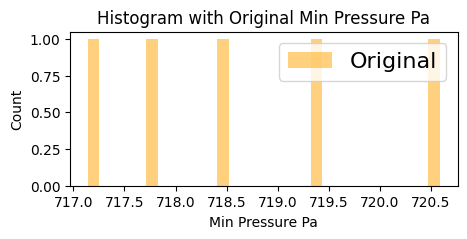

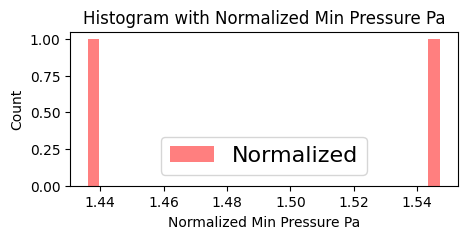

In [ ]:
# the initial distribution of Min Pressure Pa
age = X_train['Min Pressure Pa']
plt.figure(figsize=(5,2))
plt.hist(age, bins=30, alpha=0.5, label='Original', color = 'orange')
plt.legend(prop={'size': 16})
plt.title('Histogram with Original Min Pressure Pa');
plt.xlabel('Min Pressure Pa'); plt.ylabel('Count');
plt.show()

normalizer = MinMaxScaler()
X_train['Min Pressure Pa'] = normalizer.fit_transform(X_train['Min Pressure Pa'].values.reshape(-1,1))
X_test['Min Pressure Pa'] = normalizer.transform(X_test['Min Pressure Pa'].values.reshape(-1,1))

# histogram to plot the normalized values
plt.figure(figsize=(5,2))
plt.hist(X_test['Min Pressure Pa'], bins=30, alpha=0.5, label='Normalized', color = 'red')
plt.legend(prop={'size': 16})
plt.title('Histogram with Normalized Min Pressure Pa')
plt.xlabel('Normalized Min Pressure Pa')
plt.ylabel('Count')
plt.show()

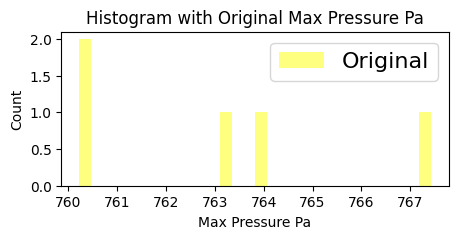

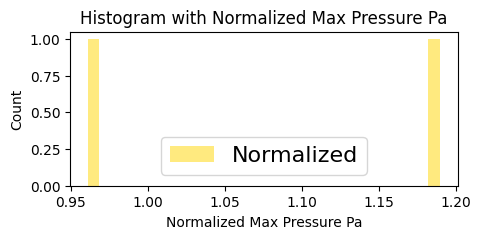

In [ ]:
# the initial distribution of Max Pressure Pa
age = X_train['Max Pressure Pa']
plt.figure(figsize=(5,2))
plt.hist(age, bins=30, alpha=0.5, label='Original', color = 'yellow')
plt.legend(prop={'size': 16})
plt.title('Histogram with Original Max Pressure Pa');
plt.xlabel('Max Pressure Pa'); plt.ylabel('Count');
plt.show()

normalizer = MinMaxScaler()
X_train['Max Pressure Pa'] = normalizer.fit_transform(X_train['Max Pressure Pa'].values.reshape(-1,1))
X_test['Max Pressure Pa'] = normalizer.transform(X_test['Max Pressure Pa'].values.reshape(-1,1))

plt.figure(figsize=(5,2))
plt.hist(X_test['Max Pressure Pa'], bins=30, alpha=0.5, label='Normalized', color = 'gold')
plt.legend(prop={'size': 16})
plt.title('Histogram with Normalized Max Pressure Pa')
plt.xlabel('Normalized Max Pressure Pa')
plt.ylabel('Count')
plt.show()

## Model Training and Evaluation

Trying different supervised learning models.

The results of the Linear Regression model:
R2 Score:  -1141.9619322441572
Mean Squared Error:  30.777414761193405
Mean Absolute Error:  3.979909855238319
Mean Absolute Percentage Error 0.22720450266954875
Predictions:
|   Min AT °F |   Max AT °F |   Y1_pred |   Y2_pred |
|------------:|------------:|----------:|----------:|
|     -96.872 |     -15.908 |  -97.0828 |  -11.3675 |


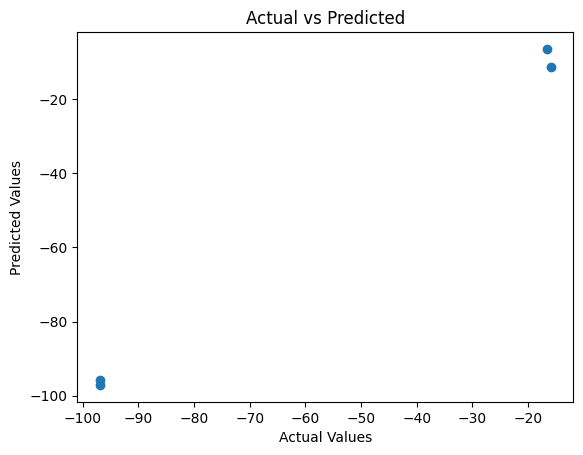

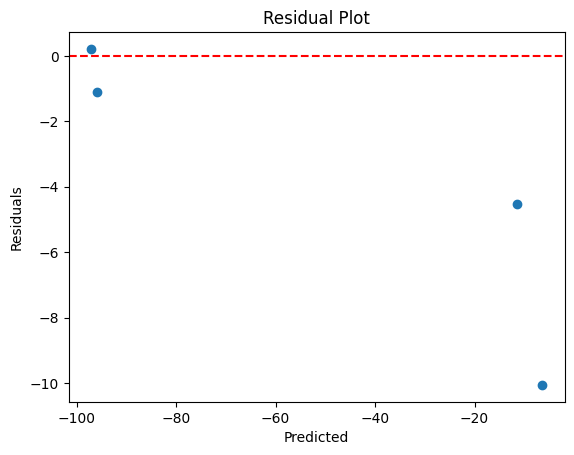

In [ ]:
# Linear Regression model
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train,y_train)
print('The results of the Linear Regression model:')
showResults(y_test,linear.predict(X_test))

The results of the Random Forest Regression model:
R2 Score:  -88.36170512547234
Mean Squared Error:  1.0440371291249677
Mean Absolute Error:  0.8154924999999413
Mean Absolute Percentage Error 0.04379438953576676
Predictions:
|   Min AT °F |   Max AT °F |   Y1_pred |   Y2_pred |
|------------:|------------:|----------:|----------:|
|     -96.872 |     -15.908 |  -97.1504 |  -14.8589 |


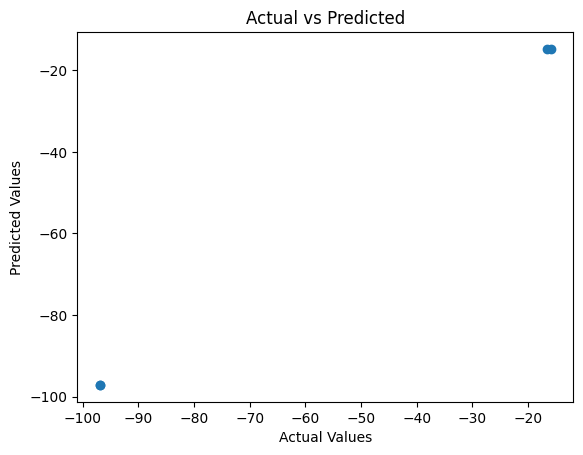

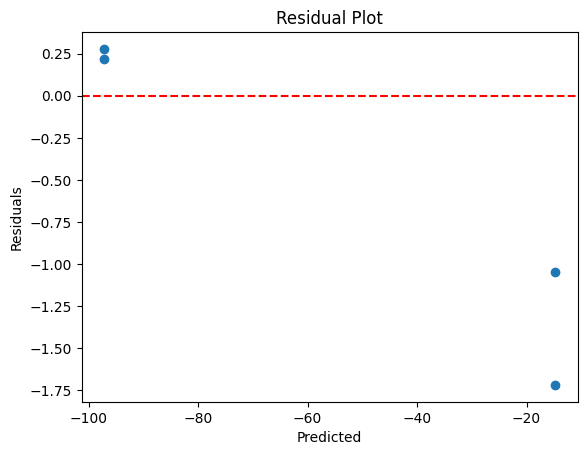

In [ ]:
# Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor

rdf = RandomForestRegressor()
rdf.fit(X_train,y_train)
print('The results of the Random Forest Regression model:')
showResults(y_test,rdf.predict(X_test))

The results of the KN Regression model:
R2 Score:  -146.68744524336606
Mean Squared Error:  11.38560018999999
Mean Absolute Error:  2.4387499999999984
Mean Absolute Percentage Error 0.14740411065680092
Predictions:
|   Min AT °F |   Max AT °F |   Y1_pred |   Y2_pred |
|------------:|------------:|----------:|----------:|
|     -96.872 |     -15.908 |  -96.7758 |  -11.4422 |


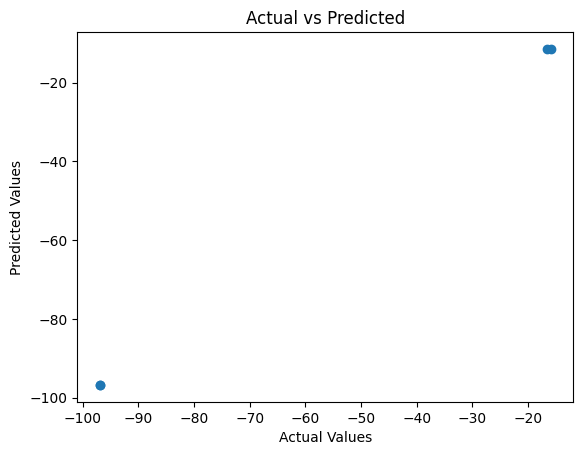

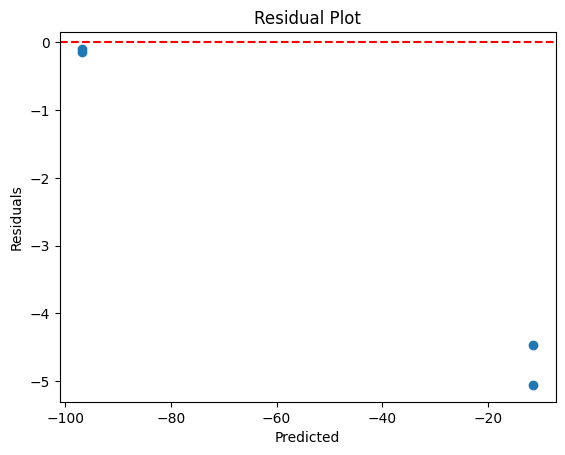

In [ ]:
# KN Regression model
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
print('The results of the KN Regression model:')
showResults(y_test,knn.predict(X_test))

The results of the Multiple Output Regression model:
R2 Score:  -23.893335249136797
Mean Squared Error:  1.0854303072329232
Mean Absolute Error:  0.7083305346740589
Mean Absolute Percentage Error 0.04153158827166469
Predictions:
|   Min AT °F |   Max AT °F |   Y1_pred |   Y2_pred |
|------------:|------------:|----------:|----------:|
|     -96.872 |     -15.908 |  -96.9642 |  -13.9379 |


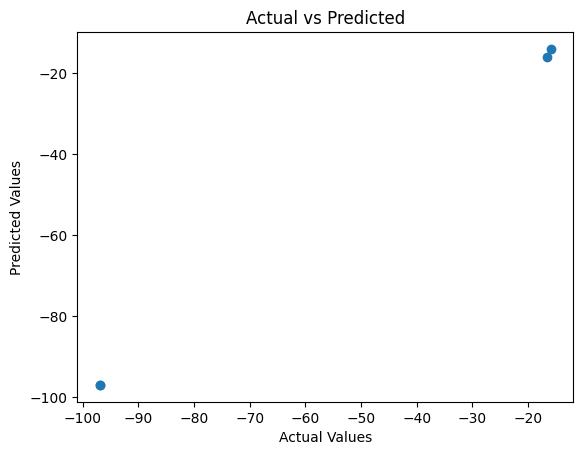

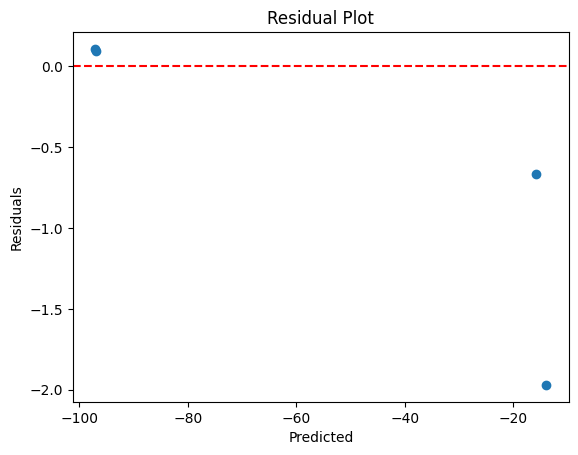

In [ ]:
# Multiple Output Regression and Support Vector Machine model
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

svm_multi = MultiOutputRegressor(SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))
svm_multi.fit(X_train,y_train)
print('The results of the Multiple Output Regression model:')
showResults(y_test,svm_multi.predict(X_test))

The results of the SVM Chain Regression model:
R2 Score:  -14.650878234086061
Mean Squared Error:  0.27837665006444134
Mean Absolute Error:  0.312187150433489
Mean Absolute Percentage Error 0.017001069687744206
Predictions:
|   Min AT °F |   Max AT °F |   Y1_pred |   Y2_pred |
|------------:|------------:|----------:|----------:|
|     -96.872 |     -15.908 |  -96.9642 |  -14.8623 |


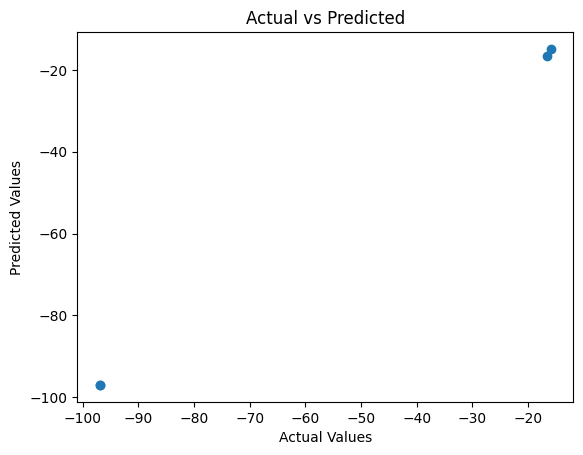

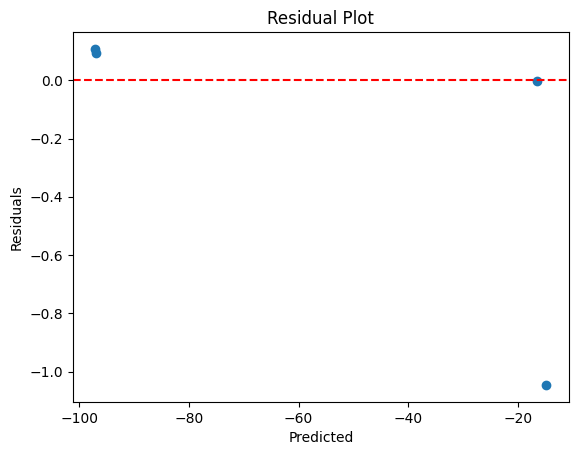

In [ ]:
# Regressor Chain model to link all the models
from sklearn.multioutput import RegressorChain

# Defining the chained multioutput model
svm_chain = RegressorChain(SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))

svm_chain.fit(X_train,y_train)
print('The results of the SVM Chain Regression model:')
showResults(y_test,svm_chain.predict(X_test))

The r2 score of the last model is the lowest as it combines all the models together to give the most accurate results.

---



## Model Deployment

In [ ]:
!pip install gradio
import gradio as gr

In [ ]:
def display(Sol, Min_Horizontal_Wind_Speed_ms, Max_Horizontal_Wind_Speed_ms, Min_Pressure_Pa, Max_Pressure_Pa, Month_Ordinal):
  features = np.array([[Sol, Min_Horizontal_Wind_Speed_ms, Max_Horizontal_Wind_Speed_ms, Min_Pressure_Pa, Max_Pressure_Pa, Month_Ordinal]])
  prediction = svm_chain.predict(features)
  return prediction[0,0].round(2), prediction[0,1].round(2)

inter_face = gr.Interface(fn = display,
                          title = "Mars Weather Prediction",
                          description = "The is a Supervised Machine Learning Model created to predict the weather on Mars. The data is collected from NASA's Open AI. The model predicts Maximum and Minimum Atmospheric Tempertaure °F",
                          theme = "allenai/gradio-theme", #theme template from hugging face theme gallery
                          inputs = [gr.Number(label='Sol (Try 700)'),
                                    gr.Number(label='Min Horizontal Wind Speed ms (Try 0.12)'),
                                    gr.Number(label='Max Horizontal Wind Speed ms (Try 19)'),
                                    gr.Number(label='Min Pressure Pa (Try 717)'),
                                    gr.Number(label='Max Pressure Pa (Try 763)'),
                                    gr.Number(label='Month Ordinal (Try 14)')],
                          outputs = [gr.Number(label='Min Atmospheric Temperature °F'),
                                     gr.Number(label='Max Atmospheric Temperature °F')],
                          flagging_mode="never")

inter_face.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f7852e6fb8b8c0cc4b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
